In [2]:
import numpy as np
import sys
path_granular = '/orange/physics-dept/an.kandala/Biophysics_projeccts/granular_learner/granular_learner_ananth/granular_learner'
#append to PATH
sys.path.append(path_granular)
from granular_learner import Granular_learner
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from force_funcs import Inner_forces, Boundary_forces


In [2]:
#INITIALIZATION
epsilon = 4
r1 = 1
r2 = 1.4*r1
Lx = 30
Ly = 15
inner_radii = [r1, r2]
prob = [0.4, 0.6]
#place input boundary spheres:
boundary_sphere_radius = 1
boundary_sphere_gap = 0 # gap between boundary spheres 
n_spheres = 50
learner = Granular_learner(Lx, Ly, inner_radii, boundary_sphere_radius, boundary_sphere_gap,epsilon)
learner.initialize_(n_spheres, prob)

In [3]:
inner_positions = learner.inner_spheres[:, :-1]
cut_offs = learner.inner_cutoffs
boundary_positions = learner.boundary_spheres[:, :-1]
boundary_cutoffs = learner.boundary_cutoffs
outimage = 'init.png'
learner.plot_box_('', outimage)

In [4]:
inner_force_mags, inner_r_diffs = Inner_forces(inner_positions, Ly, cut_offs, return_mags=True)
boundary_force_mags, boundary_r_diffs = Boundary_forces(inner_positions, boundary_positions, Ly, boundary_cutoffs, return_mags=True)

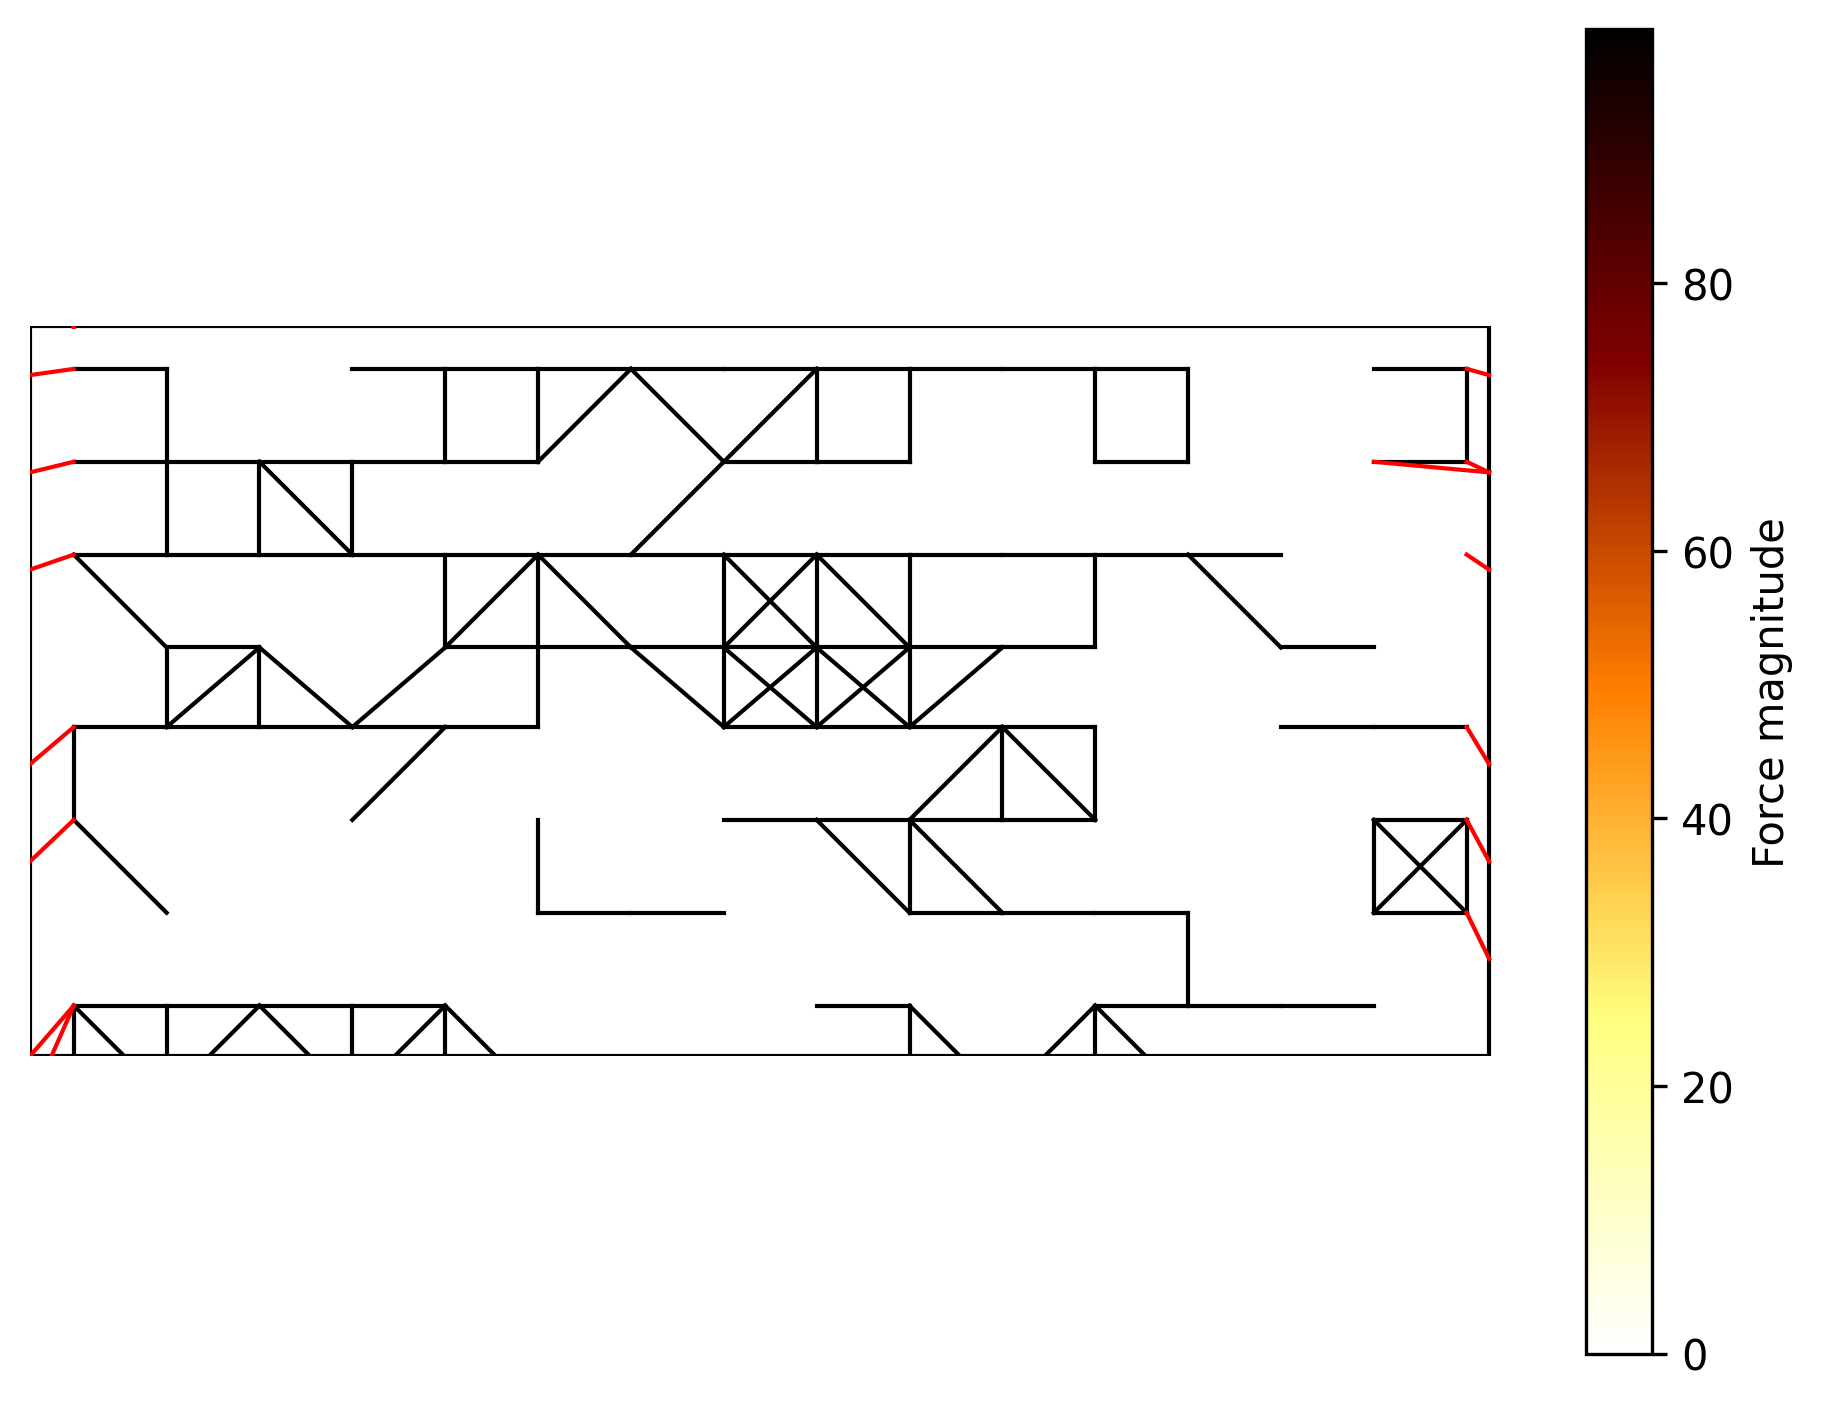

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle
obj = learner

def plot_force(ax, x1, y1, x2, y2, color, lw):
    if dy > obj.Ly:
        ax.plot([x1, x2], [x2-obj.Ly, y2-obj.Ly], color=color, lw=lw)
    elif dy < 0:
        ax.plot([x1, x2], [x2+obj.Ly, y2+obj.Ly], color=color, lw=lw)
    else:
        ax.plot([x1, x2], [y1, y2], color=color, lw=lw)

fig, ax = plt.subplots(dpi=300)
ax.set_xticks([]) #remove axes
ax.set_yticks([])
ax.set_aspect('equal', adjustable='box')
ax.set_xlim([0, Lx+0.1])
ax.set_ylim([0, Ly])

#plot the boundary rectangle
rectangle = Rectangle((0, 0), Lx, Ly, edgecolor='k', facecolor='none')
ax.axis('off')
ax.add_patch(rectangle)
# color = {r: to_rgba(f"C{i}") for i, r in enumerate(np.unique(obj.inner_spheres[:, 2]))}
color = {r: 'k' for i, r in enumerate(np.unique(obj.inner_spheres[:, 2]))}
# for j, [x,y,r] in enumerate(obj.inner_spheres):
#     #plot the sphere number at the center
#     ax.text(x, y, j, horizontalalignment='center', verticalalignment='center', fontsize=6)
#     ax.add_patch(Circle([x,y], r,  fill=None, edgecolor=color[r], alpha=0.5))
#     if y + r > obj.Ly:
#         ax.add_patch(Circle([x, y-obj.Ly], r,  fill=None, edgecolor=color[r], linestyle='--', alpha=0.5))
#     if y - r < 0:
#         ax.add_patch(Circle([x, y+obj.Ly], r,  fill=None, edgecolor=color[r], linestyle='--', alpha=0.5))

# for [x,y,r] in obj.boundary_spheres:
#     ax.add_patch(Circle([x,y], r,  fill=None, edgecolor='k'))


cmap = mpl.colormaps.get_cmap('afmhot_r')
vmax = np.max(np.append(inner_force_mags, boundary_force_mags))
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=vmax))#np.max(force_magnitudes)))
sm._A = []  # Empty array to avoid an error
plt.colorbar(sm, ax=ax, label="Force magnitude")
#plotting the inner forces
for ind, row in enumerate(inner_force_mags):
    [i, j, f] = row
    [x1, y1] = obj.inner_spheres[int(i)][:2]
    [dx, dy] = inner_r_diffs[ind]
    [x2, y2] = [x1-dx, y1-dy]
    # color = cmap(f)
    color = 'k'
    lw = 1
    plot_force(ax, x1, y1, x2, y2, color, lw)

#plotting the boundary forces
for ind, row in enumerate(boundary_force_mags):
    [i, j, f] = row
    [x1, y1] = obj.inner_spheres[int(i)][:2]
    [dx, dy] = boundary_r_diffs[ind]
    [x2, y2] = [x1-dx, y1-dy]
    color = 'r'
    lw = 1
    plot_force(ax, x1, y1, x2, y2, color, lw)    
plt.tight_layout()
plt.show()
    # pos = obj.inner_spheres[uti[1][n]][:-1]
    # [x2, y2] = pos - r_diff_vec[n]
    # ax.plot([pos[0], x2], [pos[1], y2], color='k', linestyle='--',alpha=0.5)


In [16]:
a = (True, False)
b = (False, True)
print(a+b)
if np.any(a+b):
    print('yes')

(True, False, False, True)
yes


boundary_energy = 0.9932717834355758, bulk_energy = 6.159255575541034


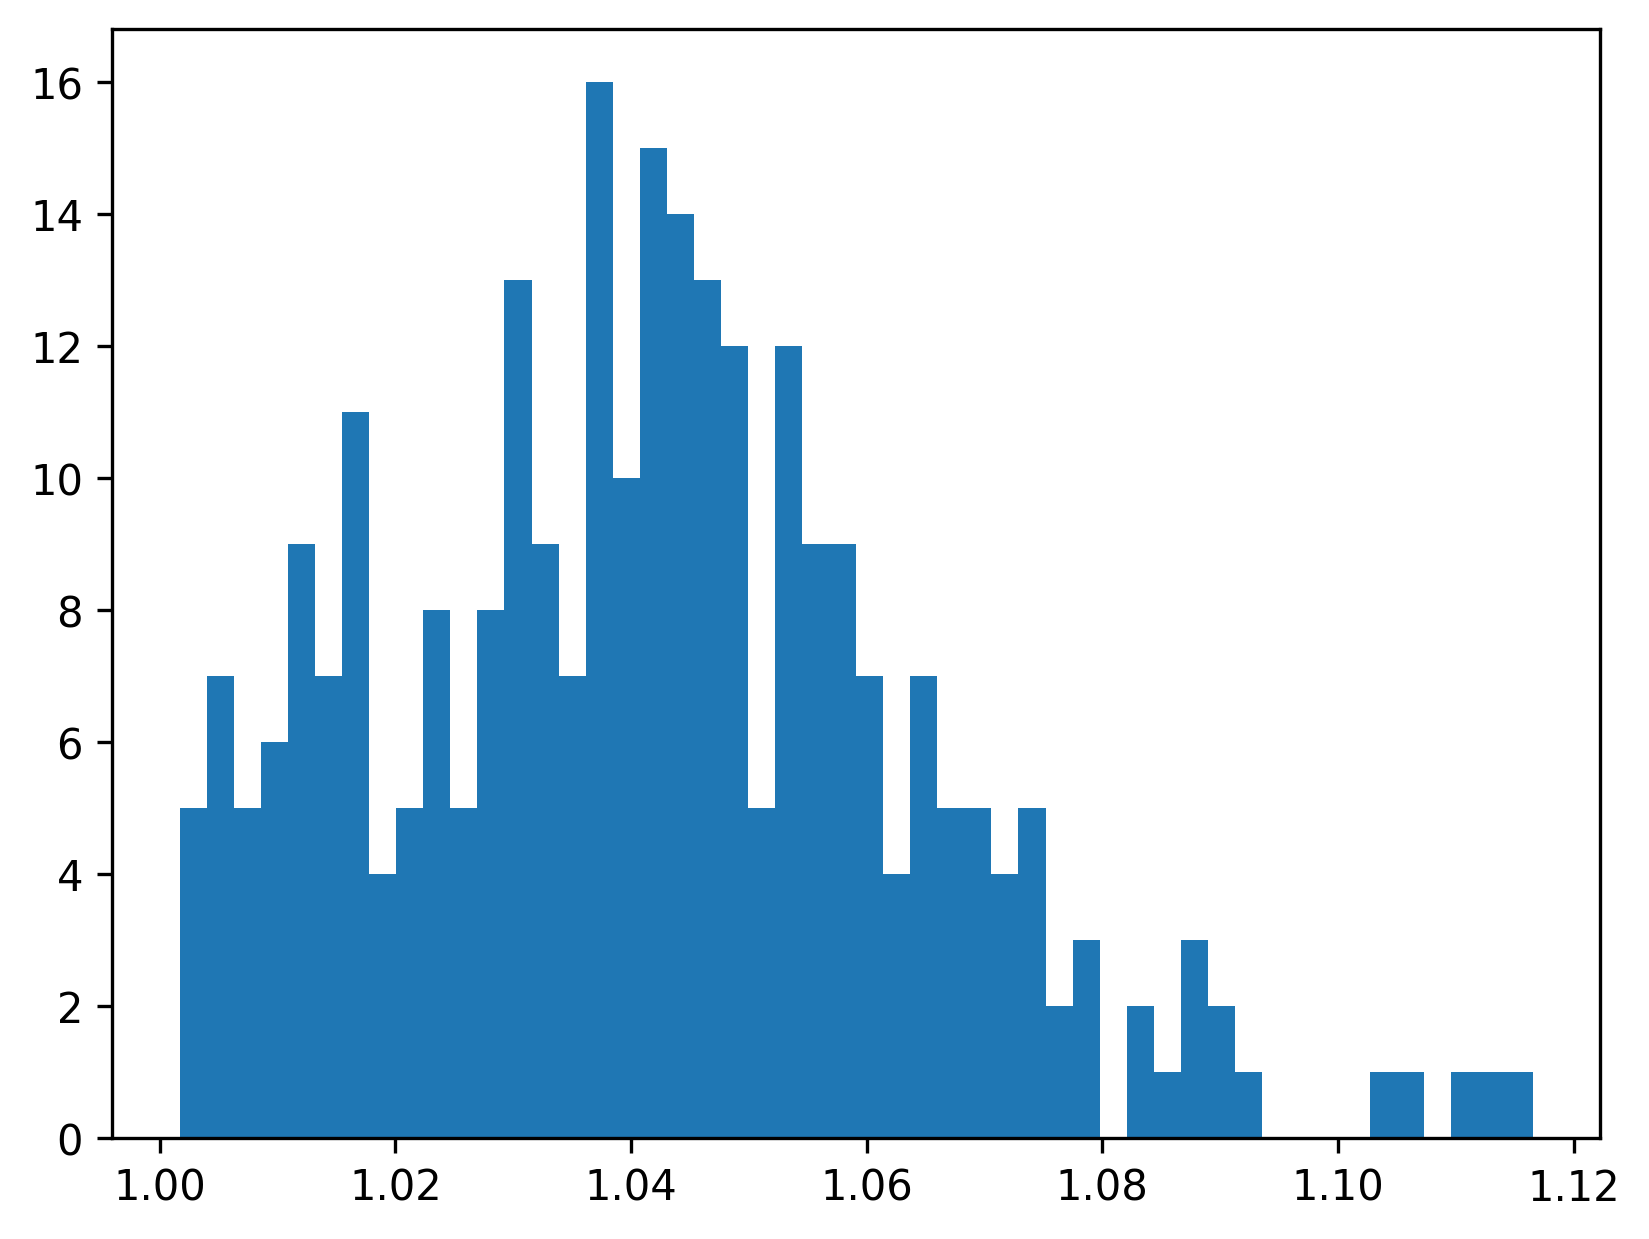

In [57]:
import sys
path_granular = '/orange/physics-dept/an.kandala/Biophysics_projeccts/granular_learner/granular_learner_ananth/granular_learner'
#append to PATH
sys.path.append(path_granular)
import numpy as np
from granular_learner import Granular_learner
from scipy.optimize import minimize
from functools import partial
from energy_func import Total_energy_func
import pickle
from force_funcs import Inner_forces, Boundary_forces
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt

inner_plot = (True, True)
boundary_plot = (True, True)
file_path = 'test.pkl'

with open(file_path, 'rb') as file:
    learner = pickle.load(file)

total_energy = learner.learner_energy_()
inner_force_mags, inner_r_diffs = Inner_forces(learner.inner_spheres[:,:-1], learner.Ly, learner.inner_cutoffs, return_mags=True)
boundary_force_mags, boundary_r_diffs = Boundary_forces(learner.inner_spheres[:,:-1], learner.boundary_spheres[:,:-1], learner.Ly, learner.boundary_cutoffs, return_mags=True)
forces = np.append(inner_force_mags[:,-1], boundary_force_mags[:,-1])
# plot the distribution of forces
fig, ax = plt.subplots(dpi=300)
ax.hist(np.exp(forces), bins=50)
plt.show()

# #Plot the spheres
# title = f'Energy function test, E = {total_energy}'
# outimage = 'f_chain.png'
# learner.plot_force_chain_(title, outimage, inner_plot, boundary_plot)

TypeError: 'ScalarMappable' object is not callable

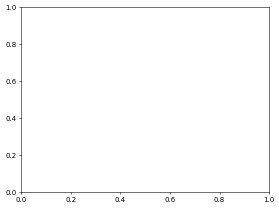

In [55]:
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
import matplotlib as mpl
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
# turn on for latex rendering   
# rc('text', usetex=True)
# rc('font', weight='bold')
# custom_preamble = {
#     "text.latex.preamble":
#         r"\usepackage{amsmath,amssymb}" # for the align, center,... environment
#         ,
#     }
# plt.rcParams.update(custom_preamble)
from matplotlib.colors import to_rgba
from matplotlib.patches import Rectangle, Circle
import numpy as np
from force_funcs import Inner_forces, Boundary_forces
fig, ax = plt.subplots(dpi=50)
cmap = mpl.colormaps.get_cmap('copper')
vmax = np.max(forces); vmin= np.min(forces)
normalize = colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalize)#, norm=plt.Normalize(vmin=0, vmax=vmax))#np.max(force_magnitudes)))
f = np.max(forces)
ax.scatter([0], [0], color=cmap(sm(f)), s=100)
plt.show()